# ***Comparación de rendimiento de predictores de meses según la climatología de la Comunidad de Madrid***

***Félix García Narocki, David Ferreras Díaz, Pablo Padial Iniesta***


# **Limpieza del dataset**

In [ ]:
import pandas as pd
# Carga xls
# Historicas
dfTempHist = pd.read_excel('./temperaturasHistoricas.xls', header=6)
dfPresHist = pd.read_excel('./presionesHistoricas.xlsm', header=6)
dfPrecipHist = pd.read_excel('./precipitacionesHistoricas.xls', header=6)

# Recientes
dfTempRec = pd.read_excel('./temperaturasRecientes.xlsm', header=6)
dfPresRec = pd.read_excel('./presionesRecientes.xlsm', header=6)
dfPrecipRec = pd.read_excel('./precipitacionesRecientes.xls', header=6)

# Muestra las primeras filas del DataFrame
print(dfTempHist.head())
print(dfPresHist.head())
print(dfPrecipHist.head())
print(dfTempRec.head())
print(dfPresRec.head())
print(dfPrecipRec.head())


    Año      Mes  Temperatura Media (1)  T. Máxima Media (2)  \
0   NaN      NaN                    NaN                  NaN   
1  1895    Enero                    3.6                  NaN   
2  1895  Febrero                    7.0                  NaN   
3  1895    Marzo                    8.1                  NaN   
4  1895    Abril                   11.9                  NaN   

   T. Mínima Media (3)  T. Máxima Absoluta (4)  Día (5)  \
0                  NaN                     NaN      NaN   
1                  NaN                    11.3      NaN   
2                  NaN                    14.7      NaN   
3                  NaN                    21.5      NaN   
4                  NaN                    22.3      NaN   

   T. Mínima Absoluta (6)  Día (7)  Mínima Superior (8)  \
0                     NaN      NaN                  NaN   
1                    -7.6      NaN                  NaN   
2                    -8.4      NaN                  NaN   
3                    -1.

In [ ]:
# Borra pie de pagina con leyendas
dfPrecipHist = dfPrecipHist[dfPrecipHist['Año'].apply(lambda x: isinstance(x, (int, float)))]
dfPresHist = dfPresHist[dfPresHist['Año'].apply(lambda x: isinstance(x, (int, float)))]
dfTempHist = dfTempHist[dfTempHist['Año'].apply(lambda x: isinstance(x, (int, float)))]

dfTempRec = dfTempRec[dfTempRec['Año'].apply(lambda x: isinstance(x, (int, float)))]
dfPresRec = dfPresRec[dfPresRec['Año'].apply(lambda x: isinstance(x, (int, float)))]
dfPrecipRec = dfPrecipRec[dfPrecipRec['Año'].apply(lambda x: isinstance(x, (int, float)))]

# Comprueba ultimas filas eliminadas
print("Temp")
print(dfTempHist["Año"].tail())
print(dfTempRec["Año"].tail())
print("Pres")
print(dfPresHist["Año"].tail())
print(dfPresRec["Año"].tail())
print("Precp")
print(dfPrecipHist["Año"].tail())
print(dfPrecipRec["Año"].tail())

Temp
1090    1985
1091    1985
1092    1985
1093     NaN
1103     NaN
Name: Año, dtype: object
319    2012
320    2012
321    2012
322     NaN
332     NaN
Name: Año, dtype: object
Pres
1018    1985
1019    1985
1020    1985
1021     NaN
1029     NaN
Name: Año, dtype: object
319    2012
320    2012
321    2012
322     NaN
330     NaN
Name: Año, dtype: object
Precp
1090    1985
1091    1985
1092    1985
1093     NaN
1112     NaN
Name: Año, dtype: object
331    2012
332    2012
333    2012
334     NaN
353     NaN
Name: Año, dtype: object


In [ ]:
# Merge de historicas con recientes y eliminando las duplicadas en uno y otro
# del año 1985
dfTemp = pd.concat([dfTempHist, dfTempRec]).drop_duplicates(subset=['Año', 'Mes'])
dfPres = pd.concat([dfPresHist, dfPresRec]).drop_duplicates(subset=['Año', 'Mes'])
dfPrecip = pd.concat([dfPrecipHist, dfPrecipRec]).drop_duplicates(subset=['Año', 'Mes'])

# Comprobacion de columna año para ver la eliminacion si distinta de 12
# Datos de 1895 a 2012 -> 2012 - 1895 + 1 = 118 años deberia haber
counts_temp = dfTemp.groupby('Año').size()
print(len(counts_temp))
print(dfTemp.columns)

# Datos de 1901 a 2012 -> 2012 - 1901 + 1 = 112 años deberia haber
counts_pres = dfPres.groupby('Año').size()
print(len(counts_pres))
print(dfPres.columns)

# Datos de 1895 a 2012 -> 2012 - 1895 + 1 = 118 años deberia haber
counts_prec = dfPrecip.groupby('Año').size()
print(len(counts_prec))
print(dfPrecip.columns)


118
Index(['Año', 'Mes', 'Temperatura Media (1)', 'T. Máxima Media (2)',
       'T. Mínima Media (3)', 'T. Máxima Absoluta (4)', 'Día (5)',
       'T. Mínima Absoluta (6)', 'Día (7)', 'Mínima Superior (8)',
       'Máxima      Inferior (9)'],
      dtype='object')
112
Index(['Año', 'Mes', 'Presión Media (2)', 'Pres. Máx. Absoluta (3)', 'Día (4)',
       'Pres. Mín. Absoluta (5)', 'Día (6)', 'Pres. Med. Nivel Mar (7)'],
      dtype='object')
118
Index(['Año', 'Mes', 'Precipitación   Total (1)', 'PrecipitaciónMáx.(2)',
       'Día (3)', 'Días Precip. Aprec. (4)', 'Días Precip. Sup. 10 (5)',
       'Días     Lluvia (6)', 'Días       Nieve (7)', 'Días    Granizo (8)',
       'Días  Heladas (9)', 'Dirección Racha (10)', 'Velocidad Racha (11)',
       'Día (12)', 'Hora (13)', 'Días Racha Sup. 55 (14)',
       'Días Racha Sup. 91 (15)', 'Velocidad Media (16)',
       'Insolación Media (17)', 'Porcentaje Insolación (18)'],
      dtype='object')


In [ ]:
# Merge de los tres dataframe haciendo la union por año
df = pd.merge(dfTemp, dfPres, on=['Año', 'Mes'])
df = pd.merge(df, dfPrecip, on=['Año', 'Mes'])
# num columnas
print(len(df.columns))
print(df.columns)

#df.drop(columns=['Día', 'Mes_y'], inplace=True)
# num columnas
#print(len(df.columns))

35
Index(['Año', 'Mes', 'Temperatura Media (1)', 'T. Máxima Media (2)',
       'T. Mínima Media (3)', 'T. Máxima Absoluta (4)', 'Día (5)',
       'T. Mínima Absoluta (6)', 'Día (7)', 'Mínima Superior (8)',
       'Máxima      Inferior (9)', 'Presión Media (2)',
       'Pres. Máx. Absoluta (3)', 'Día (4)', 'Pres. Mín. Absoluta (5)',
       'Día (6)', 'Pres. Med. Nivel Mar (7)', 'Precipitación   Total (1)',
       'PrecipitaciónMáx.(2)', 'Día (3)', 'Días Precip. Aprec. (4)',
       'Días Precip. Sup. 10 (5)', 'Días     Lluvia (6)',
       'Días       Nieve (7)', 'Días    Granizo (8)', 'Días  Heladas (9)',
       'Dirección Racha (10)', 'Velocidad Racha (11)', 'Día (12)', 'Hora (13)',
       'Días Racha Sup. 55 (14)', 'Días Racha Sup. 91 (15)',
       'Velocidad Media (16)', 'Insolación Media (17)',
       'Porcentaje Insolación (18)'],
      dtype='object')


In [ ]:
import re
import unicodedata

def quita_caracteres_espanioles(texto):
    # Normaliza el texto en forma NFD (descompone acentos)
    texto_normalizado = unicodedata.normalize('NFD', texto)
    # Filtra caracteres que NO son marcas diacríticas (Mn)
    texto_sin_tildes = ''.join(c for c in texto_normalizado if unicodedata.category(c) != 'Mn')
    return texto_sin_tildes

# Aplicar toda la limpieza a los nombres de columnas
df.columns = df.columns.str.replace(r'\s*\(\d*\)|\.', '', regex=True)   # Quita numeros entre parentesis y puntos
df.columns = df.columns.str.replace(r'\s+', '_', regex=True)           # Reemplaza espacios por _
df.columns = df.columns.str.strip()                                    # Quita espacios al principio y al final
df.columns = df.columns.map(quita_caracteres_espanioles)               # Quita tildes
# Quita primera fila con todo NaN
df = df.drop(index=0)
print(len(df.columns))
print(df.columns)
# Mostrar las primeras filas de las columnas desde 'Año' hasta 'Mes'
print(df.loc[:, 'Ano':'Mes'].head())

# Mostrar las últimas filas de las columnas desde 'Año' hasta 'Mes'
print(df.loc[:, 'Ano':'Mes'].tail())


35
Index(['Ano', 'Mes', 'Temperatura_Media', 'T_Maxima_Media', 'T_Minima_Media',
       'T_Maxima_Absoluta', 'Dia', 'T_Minima_Absoluta', 'Dia',
       'Minima_Superior', 'Maxima_Inferior', 'Presion_Media',
       'Pres_Max_Absoluta', 'Dia', 'Pres_Min_Absoluta', 'Dia',
       'Pres_Med_Nivel_Mar', 'Precipitacion_Total', 'PrecipitacionMax', 'Dia',
       'Dias_Precip_Aprec', 'Dias_Precip_Sup_10', 'Dias_Lluvia', 'Dias_Nieve',
       'Dias_Granizo', 'Dias_Heladas', 'Direccion_Racha', 'Velocidad_Racha',
       'Dia', 'Hora', 'Dias_Racha_Sup_55', 'Dias_Racha_Sup_91',
       'Velocidad_Media', 'Insolacion_Media', 'Porcentaje_Insolacion'],
      dtype='object')
    Ano      Mes
1  1901    Enero
2  1901  Febrero
3  1901    Marzo
4  1901    Abril
5  1901     Mayo
       Ano         Mes
1337  2012        Mayo
1338  2012       Junio
1339  2012       Julio
1340  2012      Agosto
1341  2012  Septiembre


In [ ]:
# Reemplazar "Dia" por "Dia_{columna_izq}"

# Para poder iterar por posicion
# cols = list(df.columns)
# new_cols = []

# for i, col in enumerate(cols):
#     if col == 'Dia':
#         prev_col = cols[i-1] # Nombre columna previa
#         new_name = f'Dia_{prev_col}'
#         new_cols.append(new_name)
#     else:
#         new_cols.append(col)

# df.columns = new_cols
# print(df.columns)


In [ ]:
# Quita columnas que no sirven
df.drop(columns=['Hora', 'Dia', 'Ano','Dias_Lluvia', 'Dias_Nieve', 'Dias_Granizo', 'Dias_Heladas','Dias_Precip_Aprec', 'Dias_Precip_Sup_10', 'Dias_Racha_Sup_55',
       'Dias_Racha_Sup_91'], inplace=True)
print(len(df.columns))
print(df.columns)

19
Index(['Mes', 'Temperatura_Media', 'T_Maxima_Media', 'T_Minima_Media',
       'T_Maxima_Absoluta', 'T_Minima_Absoluta', 'Minima_Superior',
       'Maxima_Inferior', 'Presion_Media', 'Pres_Max_Absoluta',
       'Pres_Min_Absoluta', 'Pres_Med_Nivel_Mar', 'Precipitacion_Total',
       'PrecipitacionMax', 'Direccion_Racha', 'Velocidad_Racha',
       'Velocidad_Media', 'Insolacion_Media', 'Porcentaje_Insolacion'],
      dtype='object')


In [ ]:
# Tratamiento de los datos
# Ver cuantos nulos hay
print(df.isnull().sum().sort_values())

# Elimina filas o columnas con nulos
# df.dropna(inplace=True)                # Elimina filas con al menos un NaN
# df.dropna(axis=1, inplace=True)          # Elimina columnas con NaN

# Ver cuantos nulos hay
# print(df.isnull().sum())

# Rellenar nulos
# df.fillna(0)               # Rellena con 0
# df['col'].fillna(df['col'].mean())  # Rellena con la media de la columna

# Elimina duplicados
# df.drop_duplicates()

# Corrige valores inconsistentes
# df['ciudad'].unique()  # Ver valores únicos
# df['ciudad'] = df['ciudad'].replace({'madird': 'madrid'})  # Corregir errores

# Eliminar con filtros
# Ejemplo: eliminar edades negativas o muy altas
# df = df[(df['edad'] >= 0) & (df['edad'] <= 120)]


Mes                        0
Temperatura_Media          7
T_Minima_Absoluta          7
T_Maxima_Absoluta          7
Presion_Media             18
Precipitacion_Total       41
Pres_Max_Absoluta         50
Pres_Min_Absoluta         50
PrecipitacionMax          68
Minima_Superior          235
T_Maxima_Media           235
T_Minima_Media           235
Maxima_Inferior          235
Pres_Med_Nivel_Mar       276
Velocidad_Media          381
Insolacion_Media         408
Porcentaje_Insolacion    408
Direccion_Racha          484
Velocidad_Racha          484
dtype: int64


In [ ]:
print(df.head())
print(df.tail())
# Elimina fila que tienen
#df = df.dropna(how='any')
# Reemplaza valores Ip (Inapreciable) por 0
df['Precipitacion_Total'] = df['Precipitacion_Total'].str.replace('Ip', '0')
df['Precipitacion_Total'] = df['Precipitacion_Total'].astype(float)
df['PrecipitacionMax'] = df['PrecipitacionMax'].str.replace('Ip', '0')
df['PrecipitacionMax'] = df['PrecipitacionMax'].astype(float)
print(df.isnull().sum().sort_values())
print(df.notnull().sum().sort_values())

       Mes  Temperatura_Media  T_Maxima_Media  T_Minima_Media  \
1    Enero                5.1             NaN             NaN   
2  Febrero                2.1             NaN             NaN   
3    Marzo                7.4             NaN             NaN   
4    Abril               13.0             NaN             NaN   
5     Mayo               14.9             NaN             NaN   

   T_Maxima_Absoluta  T_Minima_Absoluta  Minima_Superior  Maxima_Inferior  \
1               15.1               -7.5              NaN              NaN   
2               11.2               -7.2              NaN              NaN   
3               17.9               -1.5              NaN              NaN   
4               27.4               -0.4              NaN              NaN   
5               25.1                3.0              NaN              NaN   

   Presion_Media  Pres_Max_Absoluta  Pres_Min_Absoluta  Pres_Med_Nivel_Mar  \
1      943.10568          955.90440          926.84064              

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Cuenta cuantos nonulos hay
nonull_counts = df.notnull().sum()

# Selecciona columnas solo los que tengan mas de x no nulos
cols_con_mucho_dato = nonull_counts[nonull_counts > 800].index.tolist()
print(cols_con_mucho_dato)

# Creamos un DataFrame solo con esas columnas
df_modelo = df[cols_con_mucho_dato].copy()
print(df_modelo.notnull().sum().sort_values())

# Nos quedamos con las filas que tengan como maximo n_null datos (cuantos nulos toleramos por fila)
percentage = 1/2 # Porcentaje de nulos que no se tolera sobre el total de columnas
n_null = int(len(df_modelo.columns) * percentage)
null_count_per_row = df_modelo.isna().sum(axis=1)
df_modelo = df_modelo[null_count_per_row <= n_null]
print(f"Filas tras eliminar la que tenienen >{n_null} NaN: {len(df_modelo)}")

# Eliminamos cualquier columna que no tenga mas relleno
df_modelo = df_modelo.dropna(subset=['Mes'])

# Para rellenar datos con la mediana, por ejemplo
imputer = SimpleImputer(strategy='median')
fraction = 0.25

#  Calcula medianas y desviacion tipica por columna de features
feature_cols = [c for c in df_modelo.columns if c != 'Mes']
medians = df_modelo[feature_cols].median() # Calcula la mediana de la columna
stds    = df_modelo[feature_cols].std() # Calcula la desviacion tipica de la columna

def impute_with_noise(series, median, std, frac):
    # Si es Nan, le aplica la mediana +- una fracción de la desviacion tipica
    return series.apply(
        lambda x:
            (median + np.random.uniform(-frac * std, frac * std))
            if pd.isna(x) else x
    )

# Aplica a todas las columnas
for col in feature_cols:
    med = medians[col]
    sd  = stds[col]
    df_modelo[col] = impute_with_noise(df_modelo[col], med, sd, fraction)

# Comprueba que ya no hay NaNs
print(df_modelo[feature_cols].isna().sum())
# Comprobamos cuántas filas tenemos para entrenar
print(f"Filas originales: {len(df)}")
print(f"Filas tras filtrar + imputar: {len(df_modelo)}")

print(df_modelo.describe())
print(df_modelo.head())
print(df_modelo.tail())
print("Len cols", len(df_modelo.columns))
print(df_modelo.columns)


['Mes', 'Temperatura_Media', 'T_Maxima_Media', 'T_Minima_Media', 'T_Maxima_Absoluta', 'T_Minima_Absoluta', 'Minima_Superior', 'Maxima_Inferior', 'Presion_Media', 'Pres_Max_Absoluta', 'Pres_Min_Absoluta', 'Pres_Med_Nivel_Mar', 'Direccion_Racha', 'Velocidad_Racha', 'Velocidad_Media', 'Insolacion_Media', 'Porcentaje_Insolacion']


Direccion_Racha           857
Velocidad_Racha           857
Insolacion_Media          933
Porcentaje_Insolacion     933
Velocidad_Media           960
Pres_Med_Nivel_Mar       1065
Minima_Superior          1106
T_Minima_Media           1106
Maxima_Inferior          1106
T_Maxima_Media           1106
Pres_Min_Absoluta        1291
Pres_Max_Absoluta        1291
Presion_Media            1323
Temperatura_Media        1334
T_Minima_Absoluta        1334
T_Maxima_Absoluta        1334
Mes                      1341
dtype: int64
Filas tras eliminar la que tenienen >8 NaN: 1095
Temperatura_Media        0
T_Maxima_Media           0
T_Minima_Media           0
T_Maxima_Absoluta        0
T_Minima_Absoluta        0
Minima_Superior          0
Maxima_Inferior          0
Presion_Media            0
Pres_Max_Absoluta        0
Pres_Min_Absoluta        0
Pres_Med_Nivel_Mar       0
Direccion_Racha          0
Velocidad_Racha          0
Velocidad_Media          0
Insolacion_Media         0
Porcentaje_Insolacion 

In [ ]:
from sklearn.model_selection import train_test_split     # División estratificada
from sklearn.preprocessing import StandardScaler         # Normalización z-score
from sklearn.preprocessing import OneHotEncoder          # One-Hot (solo red NN)

# Features (X) y etiquetas (y) ------------------------------------------
X = df_modelo.drop(columns=['Mes']).values      # → matriz NumPy
y = df_modelo['Mes'].values                     # nombres de los 12 meses

# Split 1 → reservamos 20 % para **TEST** -------------------------------
X_tmp, X_test, y_tmp, y_test = train_test_split(
    X, y,
    test_size   = 0.20,          # 20 % → Test
    random_state= 42,            # reproducible
    stratify    = y              # misma distribución de meses
)

# Split 2 → de lo que queda sacamos 20 % para **VALIDACIÓN** ------------
X_train, X_val, y_train, y_val = train_test_split(
    X_tmp, y_tmp,
    test_size   = 0.15,          # 0.25×0.80 = 0.20 → Validación
    random_state= 42,
    stratify    = y_tmp
)

# Normalización (media 0, σ 1) SOLO con TRAIN ---------------------------
scaler   = StandardScaler().fit(X_train)        # aprende medias y σ
X_train_s = scaler.transform(X_train)           # Train  normalizado
X_val_s   = scaler.transform(X_val)             # Val    normalizado
X_test_s  = scaler.transform(X_test)            # Test   normalizado

# One-Hot para la red neuronal (Keras) -----------------------------------
encoder = OneHotEncoder(sparse_output=False).fit(y_train.reshape(-1, 1))

y_train_oh = encoder.transform(y_train.reshape(-1, 1))
y_val_oh   = encoder.transform(y_val.reshape(-1, 1))
y_test_oh  = encoder.transform(y_test.reshape(-1, 1))

# Comprobación rápida ----------------------------------------------------
print("Train :", X_train.shape , y_train.shape )
print("Val   :", X_val.shape   , y_val.shape   )
print("Test  :", X_test.shape  , y_test.shape  )


Train : (744, 16) (744,)
Val   : (132, 16) (132,)
Test  : (219, 16) (219,)


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

def matrix_view(y_test, y_pred):
    # Define el orden natural de los meses
    meses_ordenados = [
        'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
        'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'
    ]

    # Calcula la matriz de confusión usando ese orden
    cm = confusion_matrix(y_test, y_pred, labels=meses_ordenados)

    # Dibuja el heatmap
    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(cm, cmap='Blues')

    ax.set_xticks(np.arange(len(meses_ordenados)))
    ax.set_yticks(np.arange(len(meses_ordenados)))
    ax.set_xticklabels(meses_ordenados, rotation=45, ha="right")
    ax.set_yticklabels(meses_ordenados)
    ax.set_xlabel('Mes Predicho')
    ax.set_ylabel('Mes Real')
    ax.set_title('Matriz de Confusión de Meses')

    # Elegir color del texto en función del valor
    threshold = cm.max() / 2  # Umbral para cambiar entre blanco y negro

    for i in range(len(meses_ordenados)):
        for j in range(len(meses_ordenados)):
            color = "white" if cm[i, j] > threshold else "black"
            ax.text(j, i, cm[i, j], ha="center", va="center", color=color)

    plt.tight_layout()
    plt.show()


# **KNN**

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, top_k_accuracy_score, accuracy_score, confusion_matrix
import time

Tiempo de ejecución:  0.0020024776458740234
Top-1 Accuracy: 0.5753
Top-2 Accuracy: 0.8447
Top-3 Accuracy: 0.9498
Forma de X_train: (744, 16)
Forma de X_test:  (219, 16)
Precisión (Accuracy): 0.5753

Reporte de Clasificación:
              precision    recall  f1-score   support

       Abril       0.63      0.67      0.65        18
      Agosto       0.36      0.22      0.28        18
   Diciembre       0.25      0.17      0.20        18
       Enero       0.41      0.50      0.45        18
     Febrero       0.57      0.67      0.62        18
       Julio       0.54      0.72      0.62        18
       Junio       0.63      0.63      0.63        19
       Marzo       0.90      0.47      0.62        19
        Mayo       0.62      0.53      0.57        19
   Noviembre       0.57      0.67      0.62        18
     Octubre       0.78      0.78      0.78        18
  Septiembre       0.62      0.89      0.73        18

    accuracy                           0.58       219
   macro avg     

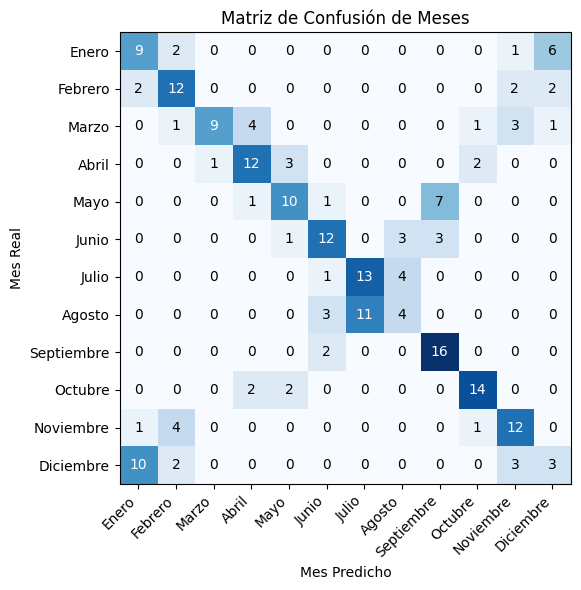

Reporte de Clasificación:
              precision    recall  f1-score   support

       Abril       0.63      0.67      0.65        18
      Agosto       0.36      0.22      0.28        18
   Diciembre       0.25      0.17      0.20        18
       Enero       0.41      0.50      0.45        18
     Febrero       0.57      0.67      0.62        18
       Julio       0.54      0.72      0.62        18
       Junio       0.63      0.63      0.63        19
       Marzo       0.90      0.47      0.62        19
        Mayo       0.62      0.53      0.57        19
   Noviembre       0.57      0.67      0.62        18
     Octubre       0.78      0.78      0.78        18
  Septiembre       0.62      0.89      0.73        18

    accuracy                           0.58       219
   macro avg       0.57      0.58      0.56       219
weighted avg       0.58      0.58      0.56       219

Importancia de características (Permutation Importance):
   feature  importance_mean  importance_std
2     

In [ ]:

# Configuramos un KNN con distancia Manhattan, votos ponderados y paralelismo
knn_model = KNeighborsClassifier(
    n_neighbors=15,
    weights='distance',
    algorithm='kd_tree',
    leaf_size=20,
    p=1,  # Usa distancia Manhattan
    metric='minkowski',
    n_jobs=-1
)
t_init = time.time()
knn_model.fit(X_train_s, y_train)
t_knn = time.time()-t_init
print("Tiempo de ejecución: ", t_knn)

# Predicción de etiquetas
y_pred = knn_model.predict(X_test_s)

# Probabilidades (útil para curvas ROC o umbrales)
# En multiclasificación devuelve matriz de shape (n_samples, n_classes)
y_proba = knn_model.predict_proba(X_test_s)

# Si fuera problema binario y te interesa la clase positiva:
# y_pred_proba_pos = y_proba[:, 1]
# auc = roc_auc_score(y_test, y_pred_proba_pos)
# print("ROC AUC:", auc)

# Métricas
knn_accuracies = []
for k in [1, 2, 3]:
    acc = top_k_accuracy_score(y_test, y_proba, k=k)
    knn_accuracies.append(acc)
    print(f"Top-{k} Accuracy: {acc:.4f}")

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Forma de X_train: {X_train.shape}")
print(f"Forma de X_test:  {X_test.shape}")
print(f"Precisión (Accuracy): {accuracy:.4f}\n")
print("Reporte de Clasificación:")
print(class_report)
print("Matriz de Confusión:")
print(conf_matrix, "\n")
matrix_view(y_test, y_pred)

print("Reporte de Clasificación:")
print(class_report)

from sklearn.inspection import permutation_importance

perm_imp = permutation_importance(
    knn_model, X_test, y_test,
    n_repeats=10, random_state=42, n_jobs=-1
)
perm_df = pd.DataFrame({
    'feature': [f"f{i}" for i in range(X.shape[1])],
    'importance_mean': perm_imp.importances_mean,
    'importance_std': perm_imp.importances_std
}).sort_values(by='importance_mean', ascending=False)

print("Importancia de características (Permutation Importance):")
print(perm_df)

# **SVC**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    top_k_accuracy_score,
    confusion_matrix,
    classification_report
)
import time

Tiempo de ejecución:  0.1053621768951416
Top-1 Accuracy: 0.7352
Top-2 Accuracy: 0.8904
Top-3 Accuracy: 0.9817
Forma de X_train: (744, 16)
Forma de X_test:  (219, 16)
Precisión (Accuracy): 0.7260


Matriz de Confusión (Top-1 predictions):
[[12  0  0  0  0  0  0  2  2  0  1  1]
 [ 0 13  0  0  0  4  1  0  0  0  0  0]
 [ 0  0 11  6  1  0  0  0  0  0  0  0]
 [ 0  0  6  9  2  0  0  0  0  1  0  0]
 [ 0  0  4  2 10  0  0  1  0  1  0  0]
 [ 0  1  0  0  0 16  1  0  0  0  0  0]
 [ 0  1  0  0  0  2 12  0  1  0  0  3]
 [ 1  0  0  0  1  0  0 16  0  0  1  0]
 [ 1  0  0  0  0  0  1  0 15  0  0  2]
 [ 0  0  2  1  2  0  0  0  0 12  1  0]
 [ 1  0  0  0  0  0  0  0  1  0 15  1]
 [ 0  0  0  0  0  0  0  0  0  0  0 18]] 



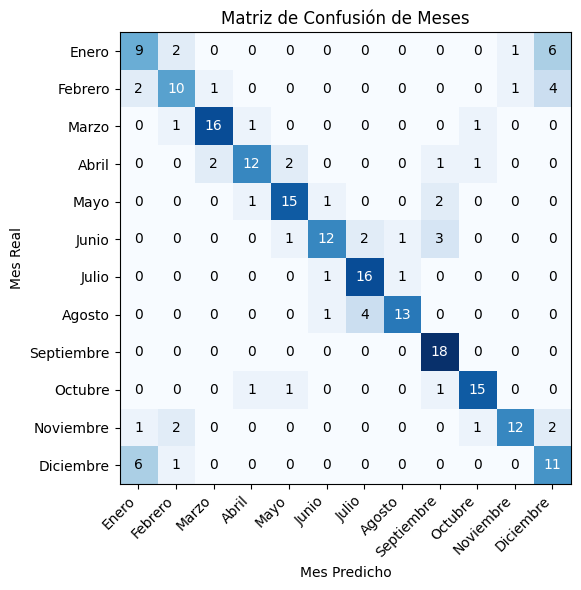

Reporte de Clasificación (Top-1 predictions):
              precision    recall  f1-score   support

       Abril       0.80      0.67      0.73        18
      Agosto       0.87      0.72      0.79        18
   Diciembre       0.48      0.61      0.54        18
       Enero       0.50      0.50      0.50        18
     Febrero       0.62      0.56      0.59        18
       Julio       0.73      0.89      0.80        18
       Junio       0.80      0.63      0.71        19
       Marzo       0.84      0.84      0.84        19
        Mayo       0.79      0.79      0.79        19
   Noviembre       0.86      0.67      0.75        18
     Octubre       0.83      0.83      0.83        18
  Septiembre       0.72      1.00      0.84        18

    accuracy                           0.73       219
   macro avg       0.74      0.73      0.72       219
weighted avg       0.74      0.73      0.73       219



In [ ]:

svc = SVC(
    kernel='rbf',
    probability=True,   # necesario para predict_proba
    C=10,              # ajustamos C
    gamma='scale',
    random_state=42
)
t_init = time.time()
svc.fit(X_train_s, y_train)
t_svc = time.time()-t_init
print("Tiempo de ejecución: ", t_svc)

y_pred  = svc.predict(X_test_s)
y_proba = svc.predict_proba(X_test_s)

svc_accuracies = []
# Cálculo de Top-1, Top-2 y Top-3 Accuracy
for k in [1, 2, 3]:
    acc = top_k_accuracy_score(y_test, y_proba, k=k)
    svc_accuracies.append(acc)
    print(f"Top-{k} Accuracy: {acc:.4f}")

accuracy = accuracy_score(y_test, y_pred)

print(f"Forma de X_train: {X_train.shape}")
print(f"Forma de X_test:  {X_test.shape}")
print(f"Precisión (Accuracy): {accuracy:.4f}\n")

# Matriz de Confusión y Reporte de Clasificación (Top-1)
print("\nMatriz de Confusión (Top-1 predictions):")
print(confusion_matrix(y_test, y_pred), "\n")

matrix_view(y_test, y_pred)

print("Reporte de Clasificación (Top-1 predictions):")
print(classification_report(y_test, y_pred, zero_division=0))


# **Logistic Regression**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    top_k_accuracy_score,
    confusion_matrix,
    classification_report
)
import time

Tiempo empleado:  0.024119138717651367
Top-1 Accuracy: 0.5890
Top-2 Accuracy: 0.8493
Top-3 Accuracy: 0.9269
Forma de X_train: (744, 16)
Forma de X_test:  (219, 16)
Precisión (Accuracy): 0.5890


Matriz de Confusión (Top‑1):
[[12  0  0  0  0  0  0  2  3  1  0  0]
 [ 0  6  0  0  0  7  1  0  0  0  0  4]
 [ 0  0  6  7  0  0  0  0  0  5  0  0]
 [ 0  0  3 11  1  0  0  0  0  3  0  0]
 [ 0  0  5  0  9  0  0  4  0  0  0  0]
 [ 0  2  0  0  0 14  1  0  0  0  0  1]
 [ 0  1  0  0  0  2  8  0  5  0  0  3]
 [ 4  0  0  0  2  0  0 13  0  0  0  0]
 [ 0  0  0  0  0  0  2  1 13  0  1  2]
 [ 0  0  3  0  3  0  0  0  0 10  2  0]
 [ 1  0  0  0  0  0  0  0  0  3 12  2]
 [ 1  0  0  0  0  0  0  0  0  0  2 15]]


C:\Users\Deiviss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


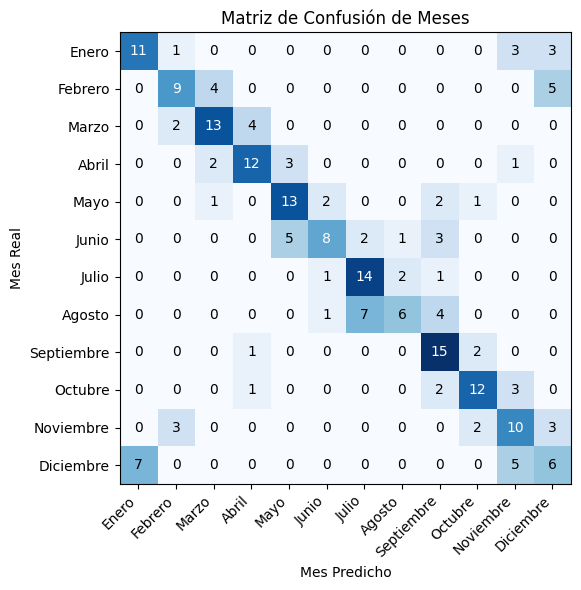


Reporte de Clasificación (Top‑1):
              precision    recall  f1-score   support

       Abril       0.67      0.67      0.67        18
      Agosto       0.67      0.33      0.44        18
   Diciembre       0.35      0.33      0.34        18
       Enero       0.61      0.61      0.61        18
     Febrero       0.60      0.50      0.55        18
       Julio       0.61      0.78      0.68        18
       Junio       0.67      0.42      0.52        19
       Marzo       0.65      0.68      0.67        19
        Mayo       0.62      0.68      0.65        19
   Noviembre       0.45      0.56      0.50        18
     Octubre       0.71      0.67      0.69        18
  Septiembre       0.56      0.83      0.67        18

    accuracy                           0.59       219
   macro avg       0.60      0.59      0.58       219
weighted avg       0.60      0.59      0.58       219



In [ ]:

lr = LogisticRegression(
    multi_class='ovr',
    solver='lbfgs',
    max_iter=2000,
    n_jobs=-1,
    random_state=42
)
t_init = time.time()
lr.fit(X_train_s, y_train)
t_logReg = time.time()-t_init
print("Tiempo empleado: ", t_logReg)

# Obtén probabilidades de cada clase
y_proba = lr.predict_proba(X_test_s)  # shape = (n_samples, n_classes)
y_pred  = lr.predict(X_test_s)        # para Top‑1

logistic_regression_accuracies = []
# Calcula Top‑1, Top‑2 y Top‑3 Accuracy
for k in [1, 2, 3]:
    acc = top_k_accuracy_score(y_test, y_proba, k=k)
    logistic_regression_accuracies.append(acc)
    print(f"Top-{k} Accuracy: {acc:.4f}")

accuracy = accuracy_score(y_test, y_pred)

print(f"Forma de X_train: {X_train.shape}")
print(f"Forma de X_test:  {X_test.shape}")
print(f"Precisión (Accuracy): {accuracy:.4f}\n")

# Matriz de Confusión y Reporte (Top‑1)
print("\nMatriz de Confusión (Top‑1):")
print(confusion_matrix(y_test, y_pred))

matrix_view(y_test, y_pred)

print("\nReporte de Clasificación (Top‑1):")
print(classification_report(y_test, y_pred, zero_division=0))


# **Decision Tree**

Tiempo de entrenamiento: 0.01 segundos
Top 1 Accuracy: 0.5890
Top 2 Accuracy: 0.7900
Top 3 Accuracy: 0.8813
Forma de X_train: (744, 16)
Forma de X_test: (219, 16)
Precisión (Accuracy): 0.5890

Matriz de Confusión:


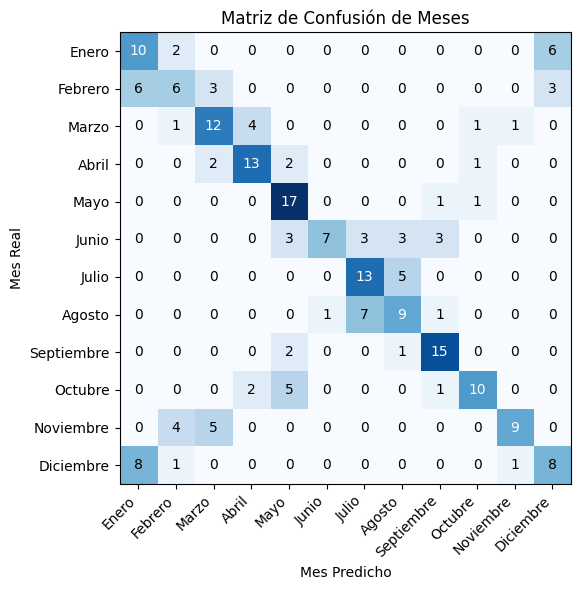


Reporte de Clasificación:
              precision    recall  f1-score   support

       Abril       0.68      0.72      0.70        18
      Agosto       0.50      0.50      0.50        18
   Diciembre       0.47      0.44      0.46        18
       Enero       0.42      0.56      0.48        18
     Febrero       0.43      0.33      0.38        18
       Julio       0.57      0.72      0.63        18
       Junio       0.88      0.37      0.52        19
       Marzo       0.55      0.63      0.59        19
        Mayo       0.59      0.89      0.71        19
   Noviembre       0.82      0.50      0.62        18
     Octubre       0.77      0.56      0.65        18
  Septiembre       0.71      0.83      0.77        18

    accuracy                           0.59       219
   macro avg       0.61      0.59      0.58       219
weighted avg       0.62      0.59      0.58       219



In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,
    min_samples_split=4,
)
# Tiempo y modelo
t_init = time.time()
dt_model.fit(X_train, y_train)
t_decTree = time.time() - t_init
print(f"Tiempo de entrenamiento: {t_decTree:.2f} segundos")

# Predicción
y_pred = dt_model.predict(X_test)
y_pred_proba = dt_model.predict_proba(X_test)
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

decision_tree_accuracies = []
for k in [1, 2, 3]:
  acc = top_k_accuracy_score(y_test, y_pred_proba, k=k)
  decision_tree_accuracies.append(acc)
  print(f"Top {k} Accuracy: {acc:.4f}")

# Reporte
print(f"Forma de X_train: {X_train.shape}")
print(f"Forma de X_test: {X_test.shape}")
print(f"Precisión (Accuracy): {accuracy:.4f}")
print("\nMatriz de Confusión:")
matrix_view(y_test, y_pred)
print("\nReporte de Clasificación:")
print(class_report)


# **RandomForest**

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, top_k_accuracy_score
import matplotlib.pyplot as plt
import time

Tiempo de entrenamiento: 0.18 segundos
Top 1 Accuracy: 0.6393
Top 2 Accuracy: 0.8904
Top 3 Accuracy: 0.9817
Forma de X_train: (744, 16)
Forma de X_test: (219, 16)
Precisión (Accuracy): 0.6484

Matriz de Confusión:


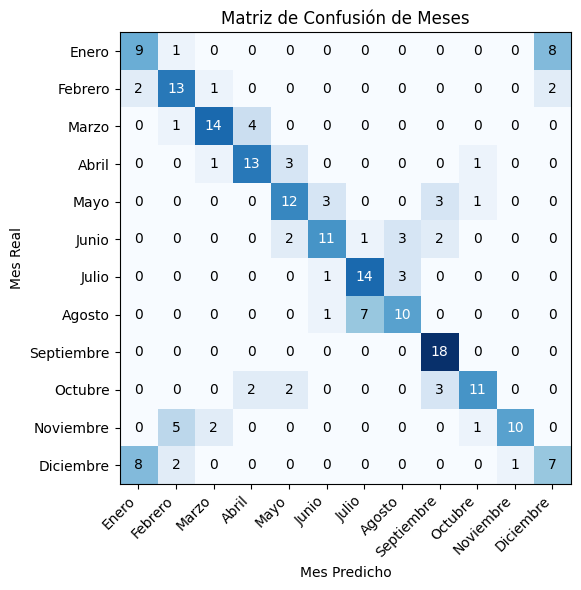


Reporte de Clasificación:
              precision    recall  f1-score   support

       Abril       0.68      0.72      0.70        18
      Agosto       0.62      0.56      0.59        18
   Diciembre       0.41      0.39      0.40        18
       Enero       0.47      0.50      0.49        18
     Febrero       0.59      0.72      0.65        18
       Julio       0.64      0.78      0.70        18
       Junio       0.69      0.58      0.63        19
       Marzo       0.78      0.74      0.76        19
        Mayo       0.63      0.63      0.63        19
   Noviembre       0.91      0.56      0.69        18
     Octubre       0.79      0.61      0.69        18
  Septiembre       0.69      1.00      0.82        18

    accuracy                           0.65       219
   macro avg       0.66      0.65      0.64       219
weighted avg       0.66      0.65      0.65       219


Importancia de las Características:
       feature  importance
1    feature_1    0.123766
0    feature_0 

In [ ]:

rf_model = RandomForestClassifier(n_estimators=100,
                                  random_state=42,
                                  max_depth=15,
                                  min_samples_split=2,
                                  min_samples_leaf=1,
                                  max_features='sqrt',
                                  n_jobs=-1
                                  )
# Tiempo y modelo
t_init = time.time()
rf_model.fit(X_train, y_train)
t_rf = time.time() - t_init
print(f"Tiempo de entrenamiento: {t_rf:.2f} segundos")

# Predicción
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
random_forest_accuracies = []
for k in [1, 2, 3]:
  acc = top_k_accuracy_score(y_test, y_pred_proba, k=k)
  random_forest_accuracies.append(acc)
  print(f"Top {k} Accuracy: {acc:.4f}")

# Reporte
print(f"Forma de X_train: {X_train.shape}")
print(f"Forma de X_test: {X_test.shape}")
print(f"Precisión (Accuracy): {accuracy:.4f}")
print("\nMatriz de Confusión:")
matrix_view(y_test, y_pred)
print("\nReporte de Clasificación:")
print(class_report)

# features
feature_names = [f"feature_{i}" for i in range(X_train.shape[1])]
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

print("\nImportancia de las Características:")
print(feature_importance_df)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Tiempo de GridSearch: 184.98 segundos
Mejores hiperparámetros: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Top 1 Accuracy: 0.6393
Top 2 Accuracy: 0.8904
Top 3 Accuracy: 0.9772


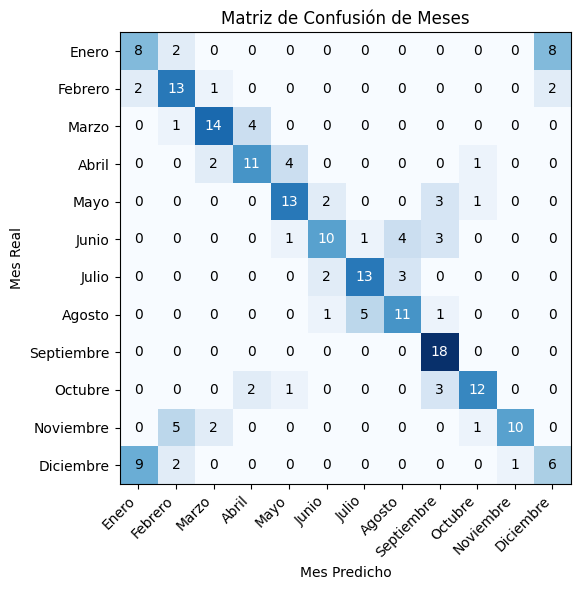


Reporte de Clasificación:
              precision    recall  f1-score   support

       Abril       0.65      0.61      0.63        18
      Agosto       0.61      0.61      0.61        18
   Diciembre       0.38      0.33      0.35        18
       Enero       0.42      0.44      0.43        18
     Febrero       0.57      0.72      0.63        18
       Julio       0.68      0.72      0.70        18
       Junio       0.67      0.53      0.59        19
       Marzo       0.74      0.74      0.74        19
        Mayo       0.68      0.68      0.68        19
   Noviembre       0.91      0.56      0.69        18
     Octubre       0.80      0.67      0.73        18
  Septiembre       0.64      1.00      0.78        18

    accuracy                           0.63       219
   macro avg       0.65      0.63      0.63       219
weighted avg       0.65      0.63      0.63       219


Top 3 configuraciones de hiperparámetros:
Rank 1: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_s

In [ ]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# LabelEncoder
encoder = LabelEncoder()
y_train_rf = encoder.fit_transform(y_train)  # Entrena codificador y transforma
y_test_rf  = encoder.transform(y_test)       # Solo transforma

# GridSearch con TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
param_grid = {
    'n_estimators':       [100, 200, 300],
    'max_depth':          [10, 15, 20, None],
    'min_samples_split':  [2, 5, 10],
    'min_samples_leaf':   [1, 2, 4]
}
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=tscv,
    verbose=1
)

# GridSearch
t_init = time.time()
grid_search.fit(X_train, y_train_rf)
t_gridSearch = time.time() - t_init
print(f"Tiempo de GridSearch: {t_gridSearch:.2f} segundos")
print("Mejores hiperparámetros:", grid_search.best_params_)

# mejor modelo
best_rf_model = grid_search.best_estimator_

# probabilidades
y_pred_proba = best_rf_model.predict_proba(X_test)

# Top-k Accuracy (usamos y_test como enteros)
time_gridSearch_accuracies = []
for k in (1, 2, 3):
    acc = top_k_accuracy_score(y_test_rf, y_pred_proba, k=k)
    time_gridSearch_accuracies.append(acc)
    print(f"Top {k} Accuracy: {acc:.4f}")

# matriz de confusión con nombres de los meses
y_pred = np.argmax(y_pred_proba, axis=1)

# Nombres de los meses originales
month_names = encoder.classes_
y_test_names = month_names[y_test_rf]
y_pred_names = month_names[y_pred]
matrix_view(y_test_names, y_pred_names)

# Reporte de clasificación con nombres de clases
print("\nReporte de Clasificación:")
print(classification_report(y_test_rf, y_pred, target_names=month_names))

# Top 3 configuraciones del GridSearch
results_sorted = pd.DataFrame(grid_search.cv_results_) \
                   .sort_values('mean_test_score', ascending=False)
top3 = results_sorted.head(3)

print("\nTop 3 configuraciones de hiperparámetros:")
for _, row in top3.iterrows():
    print(f"Rank {int(row['rank_test_score'])}: {row['params']}  "
          f"mean neg. MSE {row['mean_test_score']:.4f} ± {row['std_test_score']:.4f}")


# **GaussianNB**

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, top_k_accuracy_score
import pandas as pd
import time

Tiempo de entrenamiento: 0.00 segundos
Top 1 Accuracy: 0.5890
Top 2 Accuracy: 0.8311
Top 3 Accuracy: 0.9726
Forma de X_train: (744, 16)
Forma de X_test: (219, 16)
Precisión (Accuracy): 0.5890

Matriz de Confusión:


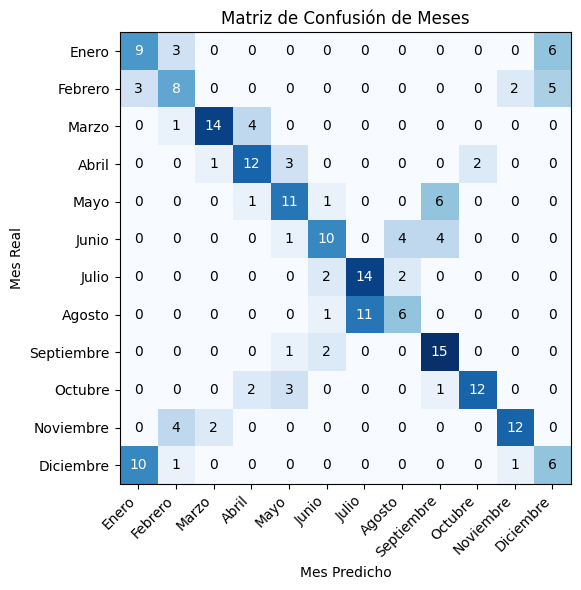


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.63      0.67      0.65        18
           1       0.50      0.33      0.40        18
           2       0.35      0.33      0.34        18
           3       0.41      0.50      0.45        18
           4       0.47      0.44      0.46        18
           5       0.56      0.78      0.65        18
           6       0.62      0.53      0.57        19
           7       0.82      0.74      0.78        19
           8       0.58      0.58      0.58        19
           9       0.80      0.67      0.73        18
          10       0.86      0.67      0.75        18
          11       0.58      0.83      0.68        18

    accuracy                           0.59       219
   macro avg       0.60      0.59      0.59       219
weighted avg       0.60      0.59      0.59       219


Importancia de las Características:
       feature   importance
0    feature_0  1295.933630
1    feature_

In [ ]:
# modelo gaussiano
nb_model = GaussianNB()

# tiempo y modelo
t_init = time.time()
nb_model.fit(X_train_s, y_train)
t_nb = time.time() - t_init
print(f"Tiempo de entrenamiento: {t_nb:.2f} segundos")

# Predicción y probabilidad
y_pred = nb_model.predict(X_test_s)
y_pred_proba = nb_model.predict_proba(X_test_s)
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

t_nb_accuracies = []
for k in [1, 2, 3]:
  acc = top_k_accuracy_score(y_test, y_pred_proba, k=k)
  t_nb_accuracies.append(acc)
  print(f"Top {k} Accuracy: {acc:.4f}")

# Reporte de clases
print(f"Forma de X_train: {X_train_s.shape}")
print(f"Forma de X_test: {X_test_s.shape}")
print(f"Precisión (Accuracy): {accuracy:.4f}")
print("\nMatriz de Confusión:")
y_test_names = encoder.inverse_transform(y_test)
y_pred_names = encoder.inverse_transform(y_pred)

matrix_view(y_test_names, y_pred_names)
print("\nReporte de Clasificación:")
print(class_report)

# Importancia
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_train_s, y_train)

importances = selector.scores_
feature_names = [f"feature_{i}" for i in range(X_train.shape[1])]
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

print("\nImportancia de las Características:")
print(feature_importance_df)

# **Genético**

In [ ]:
# Algoritmo genetico para la arquitectura de la red neuronal
# Importar librerias
import numpy as np
import random
import time
import tensorflow as tf                               # --- para medir tiempos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import concurrent.futures
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2


c:\Users\felix\anaconda3\envs\tf-directml-clean\lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.6 when it was built against 1.14.5, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [ ]:
# Variables de entrada, todas menos "Mes"
X = df_modelo.drop(columns=['Mes'])
# Variable objetivo Mes
y = df_modelo['Mes']

# Normaliza la entrada, para que no haya datos de entrada mucho mas grandes que otros
scaler   = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Codificar el objetivo (Mes) como one-hot
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1))

# Hacemos tres divisiones, los datos de entrenamiento, los de validacion y los de test
# Los primeros para entrenar
# Los segundos para comprobar como mejora la prediccion durante el entrenamiento
# Los terceros para que sean datos no vistos antes por el modelo

# 1a Divions Por ejemplo: Train (80%) y Test (20%)
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X_scaled, y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

# 2a Divions Por ejemplo: Train (85%) y Val (15%) dentro de TrainVal
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval,
    test_size=0.15,
    random_state=42,
    stratify=y_trainval
)


n_features = X_train.shape[1]   # Numero de columnas de la entrada (input de la red)
n_classes  = y_train.shape[1]   # Numero de posibles salidas (12 por los meses)

In [ ]:
max_multiplier = 60  # Multiplicador para el numero de neuronas que estará entre [n_features, n_features * max_multiplier]
initial_batch_size = 512
divisor = 5

# Funciones genéticas
activation_functions = ['relu', 'tanh', 'sigmoid']

# Crear un individuo aleatorio (arquitectura)
# Cada capa = (n_neuronas, activacion) es un gen
def create_individual():
    num_layers = random.randint(2, 6)    # Numero de capas iniciales, en el entrenamiento pueden disminuir o crecer por encima de estos
    layers = []
    for i in range(num_layers):
        if i == 0:
            # La primera capa oculta un poco limitada porque daba problemas
            neurons = random.randint(n_features // 2, n_features * 2)
        else:
            # Resto de capas ocultas mas flexible
            neurons = random.randint(n_features, max_multiplier * n_features)
        activation = random.choice(activation_functions)
        layers.append((neurons, activation))
    return layers



# Crear población inicial
def create_population(size):
    return [create_individual() for _ in range(size)]


# Evaluar el fitness de un individuo (precisión del modelo)
def evaluate_individual(individual, gen):
    import tensorflow as tf
    start = time.time()

    print(f"\nEvaluando individuo: {individual}")

    # Fuerza al uso de GPU (Si está disponible)
    with tf.device('/GPU:0'):
        # Crea la arquitectura segun los genes
        #   Dropout -> Desactiva algunas regiones de la red, evita overfitting
        #   kernel_regularizer -> Penaliza pesos muy grandes y evita overfitting
        model = Sequential()
        model.add(Input(shape=(n_features,)))

        for neurons, activation in individual:
            model.add(Dense(neurons,
                            activation=activation,
                            kernel_regularizer=l2(1e-4)))
            model.add(Dropout(0.2))

        # Capa de salida
        # Con salida codificada en one-hot es recomendado salida softmax
        model.add(Dense(n_classes, activation='softmax'))

        model.compile(optimizer=Adam(), # Encargado de actualizar los pesos
                      loss='categorical_crossentropy', # Se usa en nuestro caso cuando la salida es una codificacion one-hot
                      metrics=['accuracy']) # Referencia para saber si está aprendiendo

        # Paciencia -> Numero de epochs (Pasadas por los datos) en los que si no hay mejora, se para el
        # aprendizaje, para no continuar con esfuerzos si no hay mejora
        paciencia = 2 + len(individual) * 3 # Mas paciencia con los modelos mas grandes, que tardan mas en converger
        # Callback para parar en caso que se cumpla con la paciencia
        es = EarlyStopping(patience=paciencia,
                           restore_best_weights=True, # Restaura el mejor momento del modelo
                           verbose=0)

        # Calculos para los epoch, cuantas mas neuronas, mas pasadas, y cuanto mas adelante
        # en las generaciones, también, para que en cada generacion podamos evaluar
        # mejor a la larga
        total_neurons = sum(neurons for neurons, activation in individual)
        epochs = 20 + 5 * gen * len(individual) + total_neurons // (15 + gen)
        # El batch size son el numero de datos que se pasan antes de actualizar el modelo,
        # batcher mas grandes permiten hacer ajustes mas grandes siguiendo el grandiente y tarda
        # menos iteraciones. Un mejor batch size, permite hacer ajustes mas finos
        batch_size = max(2, (initial_batch_size // (1 + gen // divisor)))
        batch_size = 2 ** (batch_size.bit_length() - 1) # Multiplos de 2

        # El modelo se entrena con los datos de entrenamiento y se valida con los de validacion
        model.fit(X_train, y_train,
                validation_data=(X_val, y_val),
                epochs=epochs,
                batch_size=batch_size,
                verbose=0,
                callbacks=[es])
        # Testea con los datos de validacion
        _, accuracy = model.evaluate(X_val, y_val, verbose=0)

    dur = time.time() - start
    print(f"✅ Acc={accuracy:.4f} | Dur={dur:.1f}s")
    return accuracy


# Selección: los mejores individuos (elitismo + ranking)
def select_best(population, scores, num):
    sorted_pop = [x for _, x in sorted(zip(scores, population),
                                       key=lambda pair: pair[0],
                                       reverse=True)]
    return sorted_pop[:num]

# Cruce combina dos arquitecturas
def crossover(parent1, parent2):
    max_len = max(len(parent1), len(parent2))
    child = []
    for i in range(max_len):
        # Mientras i no exceda la longitud de ninguno:
        if i < len(parent1) and i < len(parent2):
            # Elige aleatoriamente si la capa actual (i) se obtiene del padre 1 o del 2
            gene = parent1[i] if random.random() < 0.5 else parent2[i]
        elif i < len(parent1):
            # Si i excede de parent 2, coge de 1
            gene = parent1[i]
        else:
            # Viceversa
            gene = parent2[i]
        child.append(gene)
    return child


# Cambia el gen del individuo (Añade, elimina o modifica las capas ocultas, el numero de neuronas y la funcion de activacion)
def mutate(individual, gen, total_generations, best_acc,
           base_add=0.1, max_add=0.5,
           base_del=0.1, max_del=0.5,
           base_layer=0.3, max_layer=0.6):

    # Mutation rate, mas cambio cuanto menos precisos son
    if best_acc > 0.8:
        factor = 1.5 * (1.0 - best_acc)
    else:
        factor = 1.0 - best_acc


    # Probabilidad de mutacion
    add_rate   = base_add   + (max_add   - base_add)   * factor # Añade capa
    del_rate   = base_del   + (max_del   - base_del)   * factor # Quita capa
    layer_rate = base_layer + (max_layer - base_layer) * factor # Modifica capas

    ind = individual.copy()

    # Mutacion de la capas ocultas
    for idx in range(len(ind)):
        # Probabilidad mayor en la primera capa (Probando porque no cambiaba mucho)
        # No es la de entrada, es la capa 1 de las ocultas
        rate = layer_rate * (1.5 if idx == 0 else 1.0)
        if random.random() < rate:
            # Escoge un numero de neuronas aleatorios entre n_features, que es el tamaño
            # de la entrada (numero de inputs) y un multiplicador * n_features [n_features, mul * n_features]
            neurons    = random.randint(1, max_multiplier) * n_features
            # Funcion de activacion al azar
            activation = random.choice(activation_functions)
            ind[idx]   = (neurons, activation)

    # Posibilidad de añadir o quitar una capa
    op = random.random()
    if op < add_rate:
        # Añade una capa con los mismos random que al modificar
        neurons    = random.randint(1, max_multiplier) * n_features
        activation = random.choice(activation_functions)
        # La inserta en una posicion aleatoria
        ind.insert(random.randint(0, len(ind)), (neurons, activation))
    elif op < add_rate + del_rate and len(ind) > 1:
        # Elmiina una capa aleatoriamente, si se puede eliminar
        ind.pop(random.randint(0, len(ind)-1))

    # Para inducir mas cambios, se introduce una pequeña posibilidad de otra mutacion mas a una capa aleatoria
    if random.random() < 0.2:
        idx = random.randint(0, len(ind)-1)
        neurons = random.randint(n_features, max_multiplier * n_features)
        activation = random.choice(activation_functions)
        ind[idx] = (neurons, activation)


    return ind

# Test para comprobar si GPU disponible
import tensorflow as tf
# Lista de GPUs detectadas
print("GPUs disponibles:", tf.config.list_physical_devices('GPU'))




GPUs disponibles: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
# Ejecutar algoritmo

population_size = 60   # Mucha diversidad: 60 arquitecturas cada generación
generations     = 40   # Profundización intensa: 40 ciclos de cruce/mutación
elite_local_num     = 12   # Conserva siempre las 12 mejores (20 % de elitismo)

population = create_population(population_size)

best_global = None # Mejor arquitectura hasta el momento
best_global_acc = 0.0 # Su accuracy

# Funcion para que con las generaciones los cruces con el mejor sean menos frecuentes
def best_crossover_probability(gen, total_generations):
    base_prob = 0.7 # Comienza con
    min_prob  = 0.2 # Minimo

    # Cuanto decae
    decay = (base_prob - min_prob) * (gen / total_generations)
    return max(min_prob, base_prob - decay)

t_init = time.time()
for gen in range(generations):
    print(f"\n\tGeneración {gen+1}/{generations}")
    # Para pasar menos parametros a executor
    def evaluate_wrapper(individual):
        return evaluate_individual(individual, gen)

    with concurrent.futures.ThreadPoolExecutor(max_workers=4) as executor:
        # crea un threadpool para evaluar a los individuos en diferentes hilos
        scores = list(executor.map(evaluate_wrapper, population))


    # Actualizamos mejor global
    gen_best_acc   = max(scores)
    gen_best_ind   = population[np.argmax(scores)]
    if gen_best_acc > best_global_acc:
        best_global_acc  = gen_best_acc
        best_global      = gen_best_ind.copy()

    mean_acc = np.mean(scores)
    print(f"\n\tResumen gen {gen+1}:  best={gen_best_acc:.4f}  | "
          f"mean={mean_acc:.4f}  |  best_global={best_global_acc:.4f}")

    print("Best global: ", best_global)
    print("Best local: ", gen_best_ind)

    # Seleccion con elitismo
    elite_local = select_best(population, scores, num=elite_local_num)

    # A la poblacion ademas de la seleccion le añadimos el mejor, para que no se pierda
    next_population = [best_global.copy()] + elite_local

    while len(next_population) < population_size:
        # % de las veces usamos al best_global como padre1
        if best_crossover_probability(gen, generations):
            parent1 = best_global
            parent2 = random.choice(elite_local)
        else:
            parent1, parent2 = random.sample(elite_local, 2)


        child = crossover(parent1, parent2)
        if parent1 == best_global or parent2 == best_global:
            child = mutate(child, gen, generations, best_global_acc, base_add=0.2, max_add=0.7, base_del=0.2, max_del=0.7)
        else:
            child = mutate(child, gen, generations, best_global_acc)
        # child = mutate(child,
        #             gen,
        #             generations,
        #             best_global_acc)   # <<< aquí
        next_population.append(child)


    population = next_population[:population_size]


t_genetico = time.time()-t_init
print("Tiempo de ejecución: ", t_genetico)
# --- NEW --------------------------------------------------------------
def quick_eval(architecture):
    """Evalúa la arquitectura SIN volver a entrenar (usa evaluate_individual)."""
    return evaluate_individual(architecture)
# ----------------------------------------------------------------------

# Mejor arquitectura final
# final_scores     = [evaluate_individual(ind, generations) for ind in population]
# best_architecture = population[np.argmax(final_scores)]
# print(f"\nMejor arquitectura encontrada: {best_architecture}")



	Generación 1/40

Evaluando individuo: [(15, 'relu'), (752, 'tanh'), (647, 'sigmoid'), (738, 'sigmoid'), (396, 'relu'), (847, 'sigmoid')]

Evaluando individuo: [(18, 'relu'), (115, 'relu'), (137, 'relu'), (224, 'relu')]

Evaluando individuo: [(31, 'relu'), (837, 'sigmoid'), (830, 'sigmoid'), (25, 'tanh'), (949, 'tanh'), (115, 'relu')]

Evaluando individuo: [(12, 'relu'), (436, 'relu'), (859, 'relu'), (802, 'sigmoid'), (374, 'sigmoid'), (792, 'sigmoid')]
✅ Acc=0.5076 | Dur=4.6s

Evaluando individuo: [(15, 'relu'), (745, 'tanh'), (287, 'sigmoid')]
✅ Acc=0.5000 | Dur=6.4s

Evaluando individuo: [(27, 'sigmoid'), (597, 'relu'), (631, 'sigmoid')]
✅ Acc=0.5303 | Dur=7.9s

Evaluando individuo: [(26, 'tanh'), (582, 'relu'), (256, 'sigmoid')]
✅ Acc=0.5000 | Dur=8.8s

Evaluando individuo: [(31, 'relu'), (511, 'tanh'), (42, 'tanh'), (431, 'sigmoid'), (492, 'relu')]
✅ Acc=0.6212 | Dur=5.1s

Evaluando individuo: [(27, 'sigmoid'), (86, 'tanh'), (932, 'tanh'), (307, 'tanh'), (581, 'relu')]
✅ Acc=0.60

# **Perceptron**

In [ ]:
import joblib

In [ ]:
# Ahora entrenamos esa arquitectura a fondo con backpropagation
def train_best_model(architecture):
    print("\n🚀 Entrenando modelo final (sin Early Stopping)…")

    model = Sequential()
    model.add(Input(shape=(n_features,)))
    for neurons, activation in architecture:          # solo (n, act)
        model.add(Dense(neurons, activation=activation))
    model.add(Dense(n_classes, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=1e-3),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    counts = np.argmax(y_train, axis=1)
    # class_weight = {i: len(counts)/np.bincount(counts)[i] for i in range(12)}


    paciencia = 300
    # Callback para parar en caso que se cumpla con la paciencia
    es = EarlyStopping(patience=paciencia,
                        restore_best_weights=True, # Restaura el mejor momento del modelo
                        verbose=0)
    # entrenar
    model.fit(X_train, y_train,
              epochs=10000,
              batch_size=256,
            #   class_weight=class_weight,
              validation_data=(X_val, y_val),
              callbacks=[es],
              verbose=1)
    return model


In [ ]:
best_architecture = best_global
print(f"\nMejor arquitectura encontrada (global): {best_architecture}")
# Entrenar y guardar el modelo final
final_model = train_best_model(best_architecture)

# Evaluar el modelo final en el conjunto de test
print("\nEvaluando el modelo final en el conjunto de test:")
loss, acc = final_model.evaluate(X_test, y_test, verbose=1)
print(f"\nPrecisión final del mejor modelo en test: {acc:.4f}")

final_model.save("modelo_mes.h5")             # H5 o carpeta SavedModel

joblib.dump(scaler,  "scaler_mes.pkl")
joblib.dump(encoder, "encoder_mes.pkl")
print("✅  Modelo y transformadores guardados en disco.")


Mejor arquitectura encontrada (global): [(272, 'tanh'), (23, 'tanh'), (467, 'relu'), (800, 'tanh'), (944, 'tanh'), (848, 'relu'), (784, 'tanh'), (353, 'relu')]

🚀 Entrenando modelo final (sin Early Stopping)…
Epoch 1/10000
3/3 [==============================] - 1s 164ms/step - loss: 2.2722 - accuracy: 0.1452 - val_loss: 1.8590 - val_accuracy: 0.2500
Epoch 2/10000
3/3 [==============================] - 0s 55ms/step - loss: 1.7882 - accuracy: 0.2917 - val_loss: 1.4696 - val_accuracy: 0.4697
Epoch 3/10000
3/3 [==============================] - 0s 51ms/step - loss: 1.4702 - accuracy: 0.3952 - val_loss: 1.3377 - val_accuracy: 0.4318
Epoch 4/10000
3/3 [==============================] - 0s 53ms/step - loss: 1.2892 - accuracy: 0.4556 - val_loss: 1.2459 - val_accuracy: 0.4924
Epoch 5/10000
3/3 [==============================] - 0s 38ms/step - loss: 1.1599 - accuracy: 0.5175 - val_loss: 1.1413 - val_accuracy: 0.5606
Epoch 6/10000
3/3 [==============================] - 0s 30ms/step - loss: 0.985

In [ ]:
n_features = X_train.shape[1]   # Numero de columnas de la entrada (input de la red)
n_classes  = y_train.shape[1]   # Numero de posibles salidas (12 por los meses)

In [ ]:
individuo_embudo = [(357, "relu"), (357, "relu"), (357, "relu"), (357, "relu"), (357, "relu"), (357, "relu"), (357, "relu"), (357, "relu"), (357, "relu"), (357, "relu"), (357, "relu"), (357, "relu"), (357, "relu"), (357, "relu"), (357, "relu"), (357, "relu"), (178, "relu")]
t_init = time.time()
modelo_enbudo = train_best_model(individuo_embudo)
t_embudo = time.time()-t_init


🚀 Entrenando modelo final (sin Early Stopping)…
Epoch 1/10000
3/3 [==============================] - 1s 168ms/step - loss: 2.4818 - accuracy: 0.0793 - val_loss: 2.4317 - val_accuracy: 0.0833
Epoch 2/10000
3/3 [==============================] - 0s 60ms/step - loss: 2.3345 - accuracy: 0.0833 - val_loss: 2.2434 - val_accuracy: 0.1667
Epoch 3/10000
3/3 [==============================] - 0s 45ms/step - loss: 2.2005 - accuracy: 0.1667 - val_loss: 2.1525 - val_accuracy: 0.1667
Epoch 4/10000
3/3 [==============================] - 0s 35ms/step - loss: 2.0921 - accuracy: 0.1519 - val_loss: 1.9873 - val_accuracy: 0.1667
Epoch 5/10000
3/3 [==============================] - 0s 29ms/step - loss: 1.9138 - accuracy: 0.1734 - val_loss: 1.8237 - val_accuracy: 0.1742
Epoch 6/10000
3/3 [==============================] - 0s 22ms/step - loss: 1.8255 - accuracy: 0.1492 - val_loss: 1.7712 - val_accuracy: 0.2348
Epoch 7/10000
3/3 [==============================] - 0s 16ms/step - loss: 1.7835 - accuracy: 0.220

In [ ]:
def predict_row_test(idx_in_test):
    # Recibe una fila y predice el mes

    import joblib

    # Carga modelo ya entrenado
    modelo  = tf.keras.models.load_model("3/modelo_mes.h5")
    scaler  = joblib.load("3/scaler_mes.pkl")
    encoder = joblib.load("3/encoder_mes.pkl")

    # Reconstruye los datos de test
    X_test_descaled = scaler.inverse_transform(X_test)
    columns = df_modelo.drop(columns=['Mes']).columns

    # Obtiene la fila segun el id
    row_raw    = X_test_descaled[idx_in_test]      # Datos desescalados para mostrar
    row_scaled = X_test[idx_in_test].reshape(1, -1) # Datos escalados para predecir

    # Mostrar la fila desescalada
    row_df = pd.DataFrame([row_raw], columns=columns)
    print("\nFila seleccionada (desescalada):")
    display(row_df)

    # Hace una prediccion
    probs = modelo.predict(row_scaled, verbose=0)[0]  # [0] porque viene como (1,12)

    # Obtener los índices de los 3 mayores valores
    top3_idx = probs.argsort()[-3:][::-1]   # ordenamos y cogemos los 3 mayores, de mayor a menor

    # Mostrar los 3 mejores
    print("\nTOP-3 meses más probables:")
    for i, idx in enumerate(top3_idx, 1):
        mes = encoder.categories_[0][idx]
        conf = probs[idx]
        print(f"  {i}. {mes}  ({conf:.2%})")

    # Obtiene y muestra el real
    idx_real = np.argmax(y_test[idx_in_test])
    mes_real = encoder.categories_[0][idx_real]

    print(f"\nMes real: {mes_real}")

    return top3_idx


In [ ]:
predict_row_test(0)


Fila seleccionada (desescalada):


,Temperatura_Media,T_Maxima_Media,T_Minima_Media,T_Maxima_Absoluta,T_Minima_Absoluta,Minima_Superior,Maxima_Inferior,Presion_Media,Pres_Max_Absoluta,Pres_Min_Absoluta,Pres_Med_Nivel_Mar,Direccion_Racha,Velocidad_Racha,Velocidad_Media,Insolacion_Media,Porcentaje_Insolacion
0,21.858228,27.108028,15.356337,32.462302,8.908451,20.614181,20.517708,937.250471,944.833615,929.783985,1011.477892,20.431396,16.712868,2.189062,9.192517,62.104632



TOP-3 meses más probables:
  1. Junio  (95.51%)
  2. Julio  (4.29%)
  3. Mayo  (0.20%)

Mes real: Junio


array([6, 5, 8], dtype=int64)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def evaluar_test_completo(modelo, X_test, y_test, encoder):
    proba       = modelo.predict(X_test, verbose=0)
    total       = X_test.shape[0]
    real_idxs   = np.argmax(y_test, axis=1)
    sorted_idxs = np.argsort(proba, axis=1)[:, ::-1]

    top1 = np.sum(real_idxs == sorted_idxs[:, 0])
    top2 = np.sum([real_idxs[i] in sorted_idxs[i, :2] for i in range(total)])
    top3 = np.sum([real_idxs[i] in sorted_idxs[i, :3] for i in range(total)])

    print("\nResultados sobre el conjunto de test:")
    print(f" - Top-1 accuracy: {top1/total:.2%} ({top1}/{total})")
    print(f" - Top-2 accuracy: {top2/total:.2%} ({top2}/{total})")
    print(f" - Top-3 accuracy: {top3/total:.2%} ({top3}/{total})")

    # 2) Orden natural de los meses
    meses_ordenados = [
        'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
        'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'
    ]

    # 3) Matriz de confusión Top-1
    preds_top1 = sorted_idxs[:, 0]
    labels     = list(encoder.categories_[0])
    idx2pos    = { labels[i]: meses_ordenados.index(labels[i]) for i in range(len(labels)) }

    real_pos = [ idx2pos[labels[i]]       for i in real_idxs ]
    pred_pos = [ idx2pos[labels[i]]       for i in preds_top1 ]
    cm       = confusion_matrix(real_pos, pred_pos, labels=range(12))

    # 4) DataFrame de conteos (opcional)
    df_conf = pd.DataFrame(
        cm,
        index=meses_ordenados,
        columns=meses_ordenados
    )
    print("\n📉 Matriz de confusión (conteos Top-1):")
    print(df_conf.to_string())

    # 5) Heatmap con Seaborn y estilo Blues
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        cm,
        annot=True, fmt='d',
        cmap='Blues',
        linewidths=0.5,
        xticklabels=meses_ordenados,
        yticklabels=meses_ordenados
    )
    plt.xlabel("Mes Predicho")
    plt.ylabel("Mes Real")
    plt.title("Matriz de Confusión de Meses (Top-1)")
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    return [top1/total, top2/total, top3/total]


dense_8              | Dense           | activation: tanh
dense_9              | Dense           | activation: tanh
dense_10             | Dense           | activation: tanh
dense_11             | Dense           | activation: sigmoid
dense_12             | Dense           | activation: sigmoid
dense_13             | Dense           | activation: relu
dense_14             | Dense           | activation: relu
dense_15             | Dense           | activation: softmax

Resultados sobre el conjunto de test:
 - Top-1 accuracy: 85.84% (188/219)
 - Top-2 accuracy: 96.80% (212/219)
 - Top-3 accuracy: 99.54% (218/219)

📉 Matriz de confusión (conteos Top-1):
            Enero  Febrero  Marzo  Abril  Mayo  Junio  Julio  Agosto  Septiembre  Octubre  Noviembre  Diciembre
Enero          14        1      0      0     0      0      0       0           0        0          1          2
Febrero         1       18      0      0     0      0      0       0           0        0          0          0
Marz

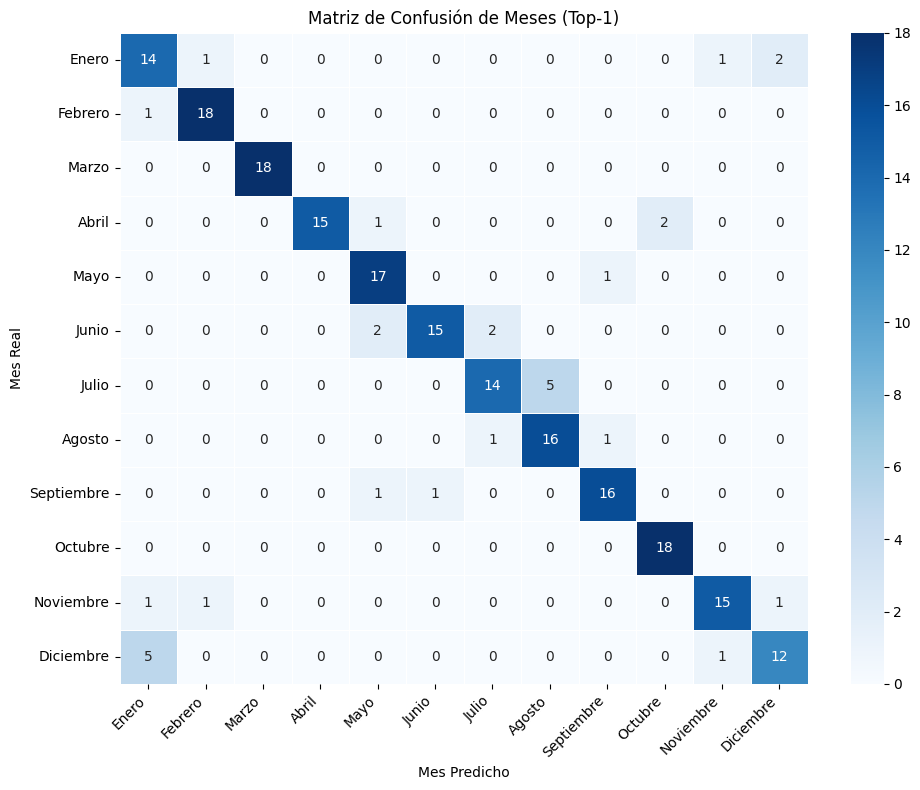

In [ ]:
import joblib

# Carga modelo ya entrenado
modelo  = tf.keras.models.load_model("best/modelo_mes.h5")
scaler  = joblib.load("best/scaler_mes.pkl")
encoder = joblib.load("best/encoder_mes.pkl")

for layer in modelo.layers:
    layer_type = layer.__class__.__name__
    # No todas las capas tienen atributo `activation`
    activation = getattr(layer, 'activation', None)
    activation_name = activation.__name__ if activation is not None else '—'
    print(f"{layer.name:20s} | {layer_type:15s} | activation: {activation_name}")

genetic_perceptron_accuracies_best = evaluar_test_completo(modelo, X_test, y_test, encoder)

In [ ]:
genetic_perceptron_accuracies_trained = evaluar_test_completo(final_model, X_test, y_test, encoder)


NameError: name 'final_model' is not defined


Resultados sobre el conjunto de test:
 - Top-1 accuracy: 55.71% (122/219)
 - Top-2 accuracy: 83.11% (182/219)
 - Top-3 accuracy: 96.35% (211/219)

📉 Matriz de confusión (conteos Top-1):
            Enero  Febrero  Marzo  Abril  Mayo  Junio  Julio  Agosto  Septiembre  Octubre  Noviembre  Diciembre
Enero           2        4      0      0     0      0      0       0           0        0          0         12
Febrero         0       12      1      0     0      0      0       0           0        0          3          3
Marzo           0        0     14      1     0      0      0       0           0        1          2          0
Abril           0        0      0     15     1      0      0       0           0        2          0          0
Mayo            0        0      0      3    10      1      0       0           4        0          0          0
Junio           0        0      0      0     0      9      0       3           7        0          0          0
Julio           0        0   

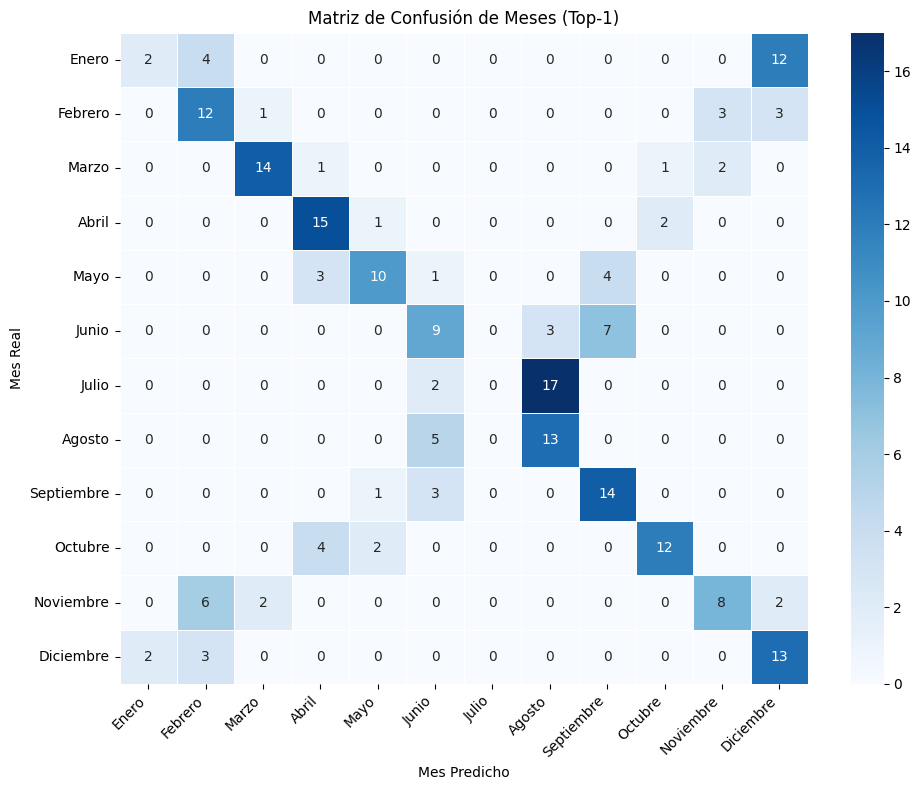

In [ ]:
genetic_perceptron_accuracies_embudo = evaluar_test_completo(modelo_enbudo, X_test, y_test, encoder)

# **Conclusiones**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
t_genetico = 110 * 60 # Para no tener que reentrenar
# — Nombres de modelos —
model_names = [
                'GaussianNB',
                'KNN',
                'Decision Tree',
                'LogReg',
                'SVC',
                'RandForest',
                'Perc Emb',
                'GridSearch',
# para no reentrenar 'Gen+Perc Trained',
               'Gen+Perc Best',
               ]

# — Tiempos (minutos) —
times_sec = [
                 t_nb,
                t_knn,
                 t_decTree,
                 t_logReg,
                 t_svc,
                 t_rf,
                 t_embudo,
                 t_gridSearch,
# para no reentrenar  t_genetico,
                 t_genetico,
                 ]

times_minutes = [times_sec / 60 for times_sec in times_sec]
print(times_minutes)
# — Precisión Top-k —
acc_top1 = [
    t_nb_accuracies[0],
    knn_accuracies[0],
    decision_tree_accuracies[0],
    logistic_regression_accuracies[0],
    svc_accuracies[0],
    random_forest_accuracies[0],
    genetic_perceptron_accuracies_embudo[0],
    time_gridSearch_accuracies[0],
# para no reentrenar  genetic_perceptron_accuracies_trained[0],
    genetic_perceptron_accuracies_best[0],
]
acc_top2 = [
    t_nb_accuracies[1],
    knn_accuracies[1],
    decision_tree_accuracies[1],
    logistic_regression_accuracies[1],
    svc_accuracies[1],
    random_forest_accuracies[1],
    genetic_perceptron_accuracies_embudo[1],
    time_gridSearch_accuracies[1],
# para no reentrenar  genetic_perceptron_accuracies_trained[1],
    genetic_perceptron_accuracies_best[1],
]
acc_top3 = [
    t_nb_accuracies[2],
    knn_accuracies[2],
    decision_tree_accuracies[2],
    logistic_regression_accuracies[2],
    svc_accuracies[2],
    random_forest_accuracies[2],
    genetic_perceptron_accuracies_embudo[2],
    time_gridSearch_accuracies[2],
# para no reentrenar  genetic_perceptron_accuracies_trained[2],
    genetic_perceptron_accuracies_best[2],
]

import matplotlib.pyplot as plt
import numpy as np


x = np.arange(len(model_names))  # posiciones en X
width = 0.25                     # ancho de cada barra

fig, ax1 = plt.subplots(figsize=(12, 6))

# Barras de precisión (Top-1, Top-2, Top-3)
bar1 = ax1.bar(x - width, acc_top1, width, label='Top-1',   color='tab:blue')
bar2 = ax1.bar(x,         acc_top2, width, label='Top-2',   color='tab:orange')
bar3 = ax1.bar(x + width, acc_top3, width, label='Top-3',   color='tab:green')

ax1.set_ylabel('Precisión')
ax1.set_xticks(x)
ax1.set_xticklabels(model_names, rotation=45, ha='right')
ax1.set_ylim(0, 1.0)

# Segundo eje para tiempos
ax2 = ax1.twinx()
ax2.plot(x, times_minutes, marker='o', linestyle='--',
         color='tab:red', label='Tiempo (min)')
ax2.set_ylabel('Tiempo de entrenamiento (min)')
ax2.set_yscale('log')

# 🔁 Extraer leyendas de ambos ejes y combinarlas
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
all_handles = handles1 + handles2
all_labels = labels1 + labels2

# 🧭 Colocar la leyenda fuera (arriba centrado)
fig.legend(all_handles, all_labels,
           loc='upper center', bbox_to_anchor=(0.5, 1.12),
           ncol=4, fontsize='medium')

plt.title('Comparación de Modelos: Precisión vs Tiempo')
plt.tight_layout()
plt.show()





NameError: name 't_nb' is not defined